In [1]:
import pickle
with open('log.pickle', 'rb') as file:
    log = pickle.load(file)

In [2]:
log

[{'JMS': OrderBook(bids={}, asks={}),
  'JAK': OrderBook(bids={9619: 0, 9617: 0, 9618: 0, 9615: 0, 9614: 0, 9616: 0, 9643: 0, 9642: 0, 9641: 0, 9640: 0, 9639: 0, 9638: 0, 9686: 0, 9685: 0, 9684: 0, 9683: 0, 9682: 0, 9681: 0, 9718: 0, 9717: 0, 9716: 0, 9715: 0, 9714: 0, 9713: 0, 9790: 0, 9789: 0, 9788: 0, 9787: 0, 9786: 0, 9785: 0, 9838: 0, 9837: 0, 9836: 0, 9835: 0, 9834: 0, 9833: 0, 9881: 0, 9880: 0, 9879: 0, 9878: 0, 9877: 0, 9876: 0, 9951: 0, 9950: 0, 9949: 0, 9948: 0, 9947: 0, 9946: 0, 9972: 0, 9971: 0, 9970: 0, 9969: 0, 9968: 0, 9967: 0, 9921: 30, 9920: 40, 9919: 50, 9918: 60, 9917: 70, 9916: 80}, asks={9649: 0, 9650: 0, 9651: 0, 9652: 0, 9653: 0, 9654: 0, 9692: 0, 9693: 0, 9694: 0, 9695: 0, 9696: 0, 9697: 0, 9724: 0, 9725: 0, 9726: 0, 9727: 0, 9728: 0, 9729: 0, 9796: 0, 9797: 0, 9798: 0, 9799: 0, 9800: 0, 9801: 0, 9844: 0, 9845: 0, 9846: 0, 9847: 0, 9848: 0, 9849: 0, 9887: 0, 9888: 0, 9889: 0, 9890: 0, 9891: 0, 9892: 0, 9957: 0, 9958: 0, 9959: 0, 9960: 0, 9961: 0, 9962: 0, 9978: 

## Case 1

Way to keep track of the order book, our open orders
1. Analyse the statistics? Mean reverting, trend following, this feeds into the fair value. 

Way to compute the fair value based on the order book
1. Straightforward: average of best bid, best ask 
2. 2nd level: more bid vol than ask, likely to go up, vice versa
3. ML techniques (order book at t) -> (order book at t+1)

Trading strategy (Jerry, Menon)
1. Penny bid $1 above the best bid, $1 below the best ask (or even $2) 
2. Different levels of penny bidding (1,2,3,4)
3. To compensate for informed trading, use fade 
4. Parameters: fair value, edge, fade, size and slack

In [3]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Case1_Historical.csv")[['EPT', 'DLO', 'MKU', 'IGM', 'BRV']]
df  

,EPT,DLO,MKU,IGM,BRV
0,3882,4744,4189,6808,4592
1,4958,5282,5408,5570,5612
2,4298,4778,4802,5300,5221
3,5056,5097,5216,5112,5264
4,4928,5157,5441,5690,5642
...,...,...,...,...,...
247,4878,5566,6090,6173,6626
248,3956,4720,4454,6186,4938
249,4706,4854,5030,4676,5270
250,5218,5191,5254,5269,5194


In [11]:
fair_values = df.mean()
fair_values

EPT    4705.341270
DLO    4951.623016
MKU    4987.138889
IGM    5691.936508
BRV    5153.198413
dtype: float64

In [8]:
returns = (df - 5000) / 5000 
returns
correlation_matrix = df.corr()
correlation_matrix

# estimation of the correlations 


,EPT,DLO,MKU,IGM,BRV
EPT,1.000000,-0.110070,0.032335,-0.812085,-0.353297
DLO,-0.110070,1.000000,0.885489,0.433780,0.883668
MKU,0.032335,0.885489,1.000000,0.300479,0.922402
IGM,-0.812085,0.433780,0.300479,1.000000,0.579312
BRV,-0.353297,0.883668,0.922402,0.579312,1.000000


In [19]:

# Assuming 'data' is your histogram data
data = np.log(df['BRV'])

# List of distributions to try
distributions = [stats.norm, stats.expon, stats.lognorm]

# Fit each distribution and store the sum of squared errors
sse = {}
for dist in distributions:
    params = dist.fit(data)
    sse[dist.name] = np.sum((data - dist(*params).rvs(len(data)))**2)

# Find the distribution with the lowest sum of squared errors
best_fit = min(sse, key=sse.get)

print(f"The best fitting distribution is {best_fit}")

The best fitting distribution is norm


<Axes: >

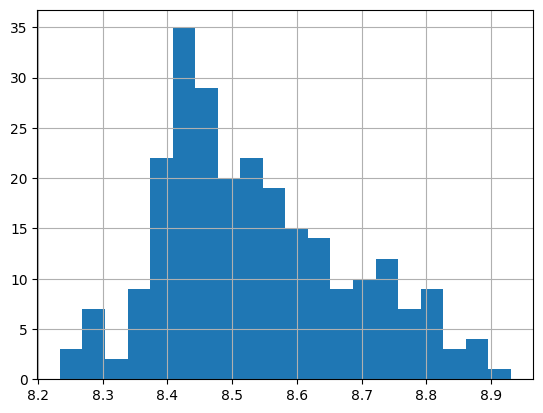

In [29]:
x = np.log(df['BRV'])
x.hist(bins = 20)

Prices follow a log normal distribution.

In [31]:
from typing import Optional

from xchangelib import xchange_client
import asyncio

xchange_client.SYMBOLS

['JMS', 'JAK', 'EPT', 'DLO', 'MKU', 'IGM', 'BRV', 'SCP']